# Manuel Rodríguez Cáceres Tarea NaiveBayes

librerias

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Importamos los clasificadores Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

# Para preprocesar los datos
from sklearn.preprocessing import MinMaxScaler, Binarizer, KBinsDiscretizer

import warnings
warnings.filterwarnings('ignore')

Función para pintar la matriz de confusión

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    """
    Esta función imprime y dibuja la matriz de confusión.
    Se puede aplicar normalización estableciendo `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Obtenemos las etiquetas únicas que aparecen en los datos
    labels_unicos = unique_labels(y_true, y_pred)
    # Filtramos las clases para quedarnos solo con las que aparecen
    classes_filtradas = [c for c in classes if c in labels_unicos]
    classes = np.array(classes_filtradas)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # Queremos mostrar todos los ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... y etiquetarlos con las entradas de la lista respectiva
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotar las etiquetas de los ticks y establecer su alineación.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Bucle sobre las dimensiones de los datos y crear anotaciones de texto.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax


1: DATASET IRIS

In [ ]:

print("="*70)
print("COMPARATIVA DE CLASIFICADORES NAIVE BAYES - DATASET IRIS")
print("="*70)

# Cargamos el dataset Iris
iris = sns.load_dataset('iris')
print("\nDataset Iris cargado:")
print(iris.head())

# Separamos datos de entrada (X) y salida (y)
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Separamos train y test
Xtrain_iris, Xtest_iris, ytrain_iris, ytest_iris = train_test_split(
    X_iris, y_iris, test_size=0.33, random_state=1
)

print(f"\nTamaño del conjunto de entrenamiento: {len(Xtrain_iris)}")
print(f"Tamaño del conjunto de prueba: {len(Xtest_iris)}")

# Array con los nombres de las clases
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

# Diccionario para guardar las precisiones
precisiones_iris = {}


COMPARATIVA DE CLASIFICADORES NAIVE BAYES - DATASET IRIS

Dataset Iris cargado:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Tamaño del conjunto de entrenamiento: 100
Tamaño del conjunto de prueba: 50


GaussianNB


----------------------------------------------------------------------
1. GAUSSIANNB
----------------------------------------------------------------------
Precisión: 0.94
Confusion matrix, without normalization
[[17  0  0]
 [ 0 17  2]
 [ 0  1 13]]


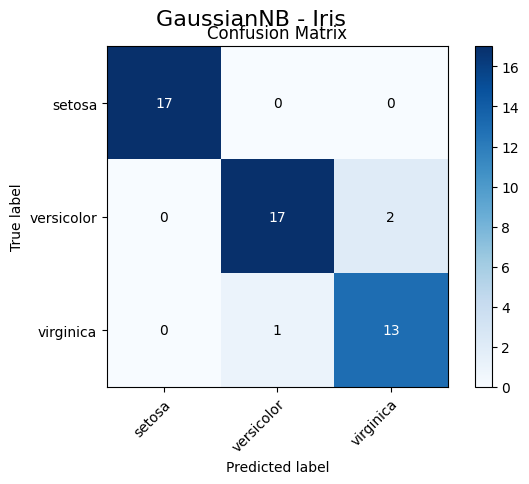

In [ ]:
print("\n" + "-"*70)
print("1. GAUSSIANNB")
print("-"*70)

# Elegimos el clasificador
modelo = GaussianNB()
# Entrenamos el modelo
modelo.fit(Xtrain_iris, ytrain_iris)
# Hacemos la predicción
y_pred = modelo.predict(Xtest_iris)
# Calculamos la precisión
precision = accuracy_score(ytest_iris, y_pred)
precisiones_iris['GaussianNB'] = precision
print(f"Precisión: {precision:.2f}")

# Mostramos la matriz de confusión
plot_confusion_matrix(ytest_iris, y_pred, classes=clases_iris,
                     normalize=False, title='Confusion Matrix',
                     titleSup='GaussianNB - Iris')
plt.show()

MultinomialNB


----------------------------------------------------------------------
2. MULTINOMIALNB
----------------------------------------------------------------------
Precisión: 0.62
Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


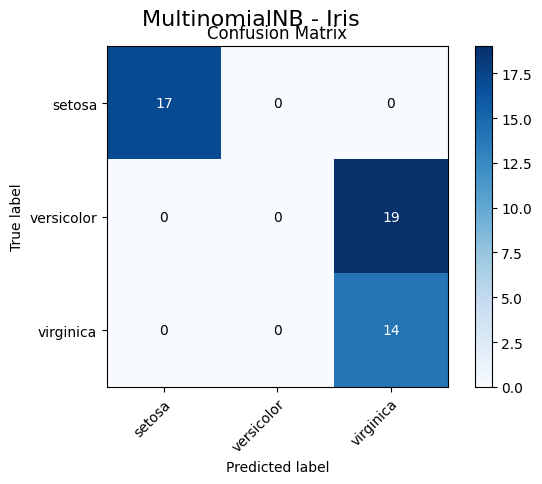

In [ ]:
print("\n" + "-"*70)
print("2. MULTINOMIALNB")
print("-"*70)

# MultinomialNB necesita datos no negativos, así que escalamos
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_iris)
Xtest_scaled = scaler.transform(Xtest_iris)

modelo = MultinomialNB()
modelo.fit(Xtrain_scaled, ytrain_iris)
y_pred = modelo.predict(Xtest_scaled)
precision = accuracy_score(ytest_iris, y_pred)
precisiones_iris['MultinomialNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_iris, y_pred, classes=clases_iris,
                     normalize=False, title='Confusion Matrix',
                     titleSup='MultinomialNB - Iris')
plt.show()

ComplementNB


----------------------------------------------------------------------
3. COMPLEMENTNB
----------------------------------------------------------------------
Precisión: 0.62
Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


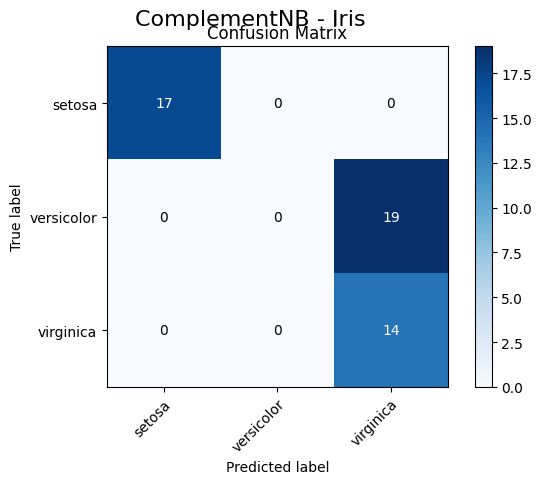

In [ ]:
print("\n" + "-"*70)
print("3. COMPLEMENTNB")
print("-"*70)

modelo = ComplementNB()
modelo.fit(Xtrain_scaled, ytrain_iris)
y_pred = modelo.predict(Xtest_scaled)
precision = accuracy_score(ytest_iris, y_pred)
precisiones_iris['ComplementNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_iris, y_pred, classes=clases_iris,
                     normalize=False, title='Confusion Matrix',
                     titleSup='ComplementNB - Iris')
plt.show()

BernoulliNB


----------------------------------------------------------------------
4. BERNOULLINB
----------------------------------------------------------------------
Precisión: 0.62
Confusion matrix, without normalization
[[17  0  0]
 [ 1  0 18]
 [ 0  0 14]]


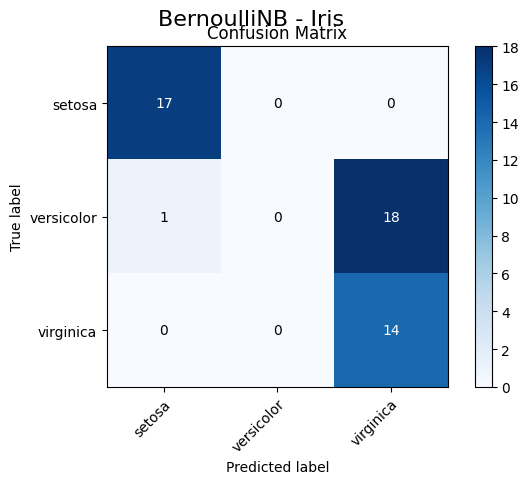

In [ ]:
print("\n" + "-"*70)
print("4. BERNOULLINB")
print("-"*70)

# Binarizamos los datos (convertimos a 0 y 1)
binarizer = Binarizer(threshold=Xtrain_iris.median().mean())
Xtrain_bin = binarizer.fit_transform(Xtrain_iris)
Xtest_bin = binarizer.transform(Xtest_iris)

modelo = BernoulliNB()
modelo.fit(Xtrain_bin, ytrain_iris)
y_pred = modelo.predict(Xtest_bin)
precision = accuracy_score(ytest_iris, y_pred)
precisiones_iris['BernoulliNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_iris, y_pred, classes=clases_iris,
                     normalize=False, title='Confusion Matrix',
                     titleSup='BernoulliNB - Iris')
plt.show()

CategoricalNB


----------------------------------------------------------------------
5. CATEGORICALNB
----------------------------------------------------------------------
Precisión: 0.96
Confusion matrix, without normalization
[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]


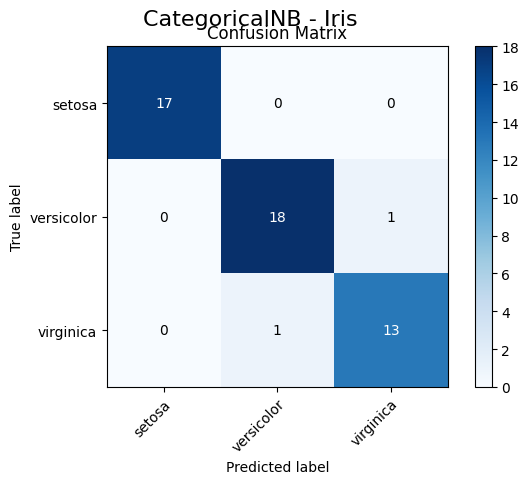

In [ ]:
print("\n" + "-"*70)
print("5. CATEGORICALNB")
print("-"*70)

# Discretizamos los datos continuos en categorías
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
Xtrain_cat = discretizer.fit_transform(Xtrain_iris)
Xtest_cat = discretizer.transform(Xtest_iris)

modelo = CategoricalNB()
modelo.fit(Xtrain_cat, ytrain_iris)
y_pred = modelo.predict(Xtest_cat)
precision = accuracy_score(ytest_iris, y_pred)
precisiones_iris['CategoricalNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_iris, y_pred, classes=clases_iris,
                     normalize=False, title='Confusion Matrix',
                     titleSup='CategoricalNB - Iris')
plt.show()

2: DATASET PENGUINS

In [ ]:
print("\n\n" + "="*70)
print("COMPARATIVA DE CLASIFICADORES NAIVE BAYES - DATASET PENGUINS")
print("="*70)

# Cargamos el dataset Penguins
penguins = sns.load_dataset('penguins')
print("\nDataset Penguins cargado:")
print(penguins.head())

# Eliminamos filas con valores nulos
penguins = penguins.dropna()
print(f"\nFilas después de limpiar datos nulos: {len(penguins)}")

# Seleccionamos solo las columnas numéricas
X_penguins = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_penguins = penguins['species']

# Separamos train y test
Xtrain_peng, Xtest_peng, ytrain_peng, ytest_peng = train_test_split(
    X_penguins, y_penguins, test_size=0.33, random_state=1
)

print(f"\nTamaño del conjunto de entrenamiento: {len(Xtrain_peng)}")
print(f"Tamaño del conjunto de prueba: {len(Xtest_peng)}")

# Array con los nombres de las clases
clases_penguins = np.array(['Adelie', 'Chinstrap', 'Gentoo'])

# Diccionario para guardar las precisiones
precisiones_penguins = {}



COMPARATIVA DE CLASIFICADORES NAIVE BAYES - DATASET PENGUINS

Dataset Penguins cargado:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Filas después de limpiar datos nulos: 333

Tamaño del conjunto de entrenamiento: 223
Tamaño del conjunto de prueba: 110


 GaussianNB


----------------------------------------------------------------------
1. GAUSSIANNB
----------------------------------------------------------------------
Precisión: 0.96
Confusion matrix, without normalization
[[43  4  0]
 [ 0 27  0]
 [ 0  0 36]]


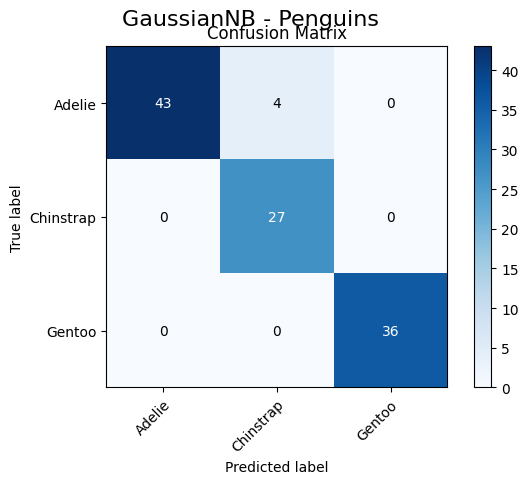

In [ ]:
print("\n" + "-"*70)
print("1. GAUSSIANNB")
print("-"*70)

modelo = GaussianNB()
modelo.fit(Xtrain_peng, ytrain_peng)
y_pred = modelo.predict(Xtest_peng)
precision = accuracy_score(ytest_peng, y_pred)
precisiones_penguins['GaussianNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_peng, y_pred, classes=clases_penguins,
                     normalize=False, title='Confusion Matrix',
                     titleSup='GaussianNB - Penguins')
plt.show()

MultinomialNB


----------------------------------------------------------------------
2. MULTINOMIALNB
----------------------------------------------------------------------
Precisión: 0.75
Confusion matrix, without normalization
[[47  0  0]
 [27  0  0]
 [ 0  0 36]]


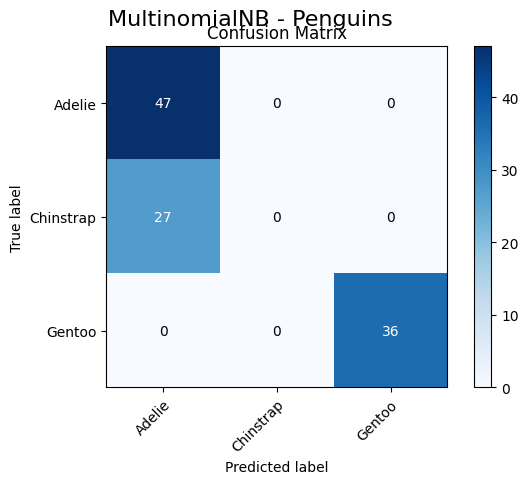

In [ ]:
print("\n" + "-"*70)
print("2. MULTINOMIALNB")
print("-"*70)

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_peng)
Xtest_scaled = scaler.transform(Xtest_peng)

modelo = MultinomialNB()
modelo.fit(Xtrain_scaled, ytrain_peng)
y_pred = modelo.predict(Xtest_scaled)
precision = accuracy_score(ytest_peng, y_pred)
precisiones_penguins['MultinomialNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_peng, y_pred, classes=clases_penguins,
                     normalize=False, title='Confusion Matrix',
                     titleSup='MultinomialNB - Penguins')
plt.show()


ComplementNB


----------------------------------------------------------------------
3. COMPLEMENTNB
----------------------------------------------------------------------
Precisión: 0.76
Confusion matrix, without normalization
[[47  0  0]
 [26  1  0]
 [ 0  0 36]]


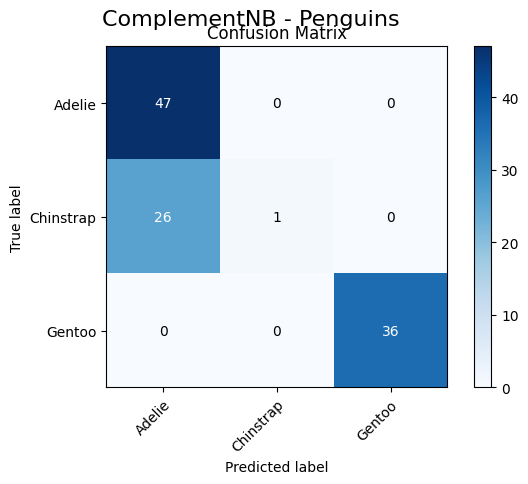

In [ ]:
print("\n" + "-"*70)
print("3. COMPLEMENTNB")
print("-"*70)

modelo = ComplementNB()
modelo.fit(Xtrain_scaled, ytrain_peng)
y_pred = modelo.predict(Xtest_scaled)
precision = accuracy_score(ytest_peng, y_pred)
precisiones_penguins['ComplementNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_peng, y_pred, classes=clases_penguins,
                     normalize=False, title='Confusion Matrix',
                     titleSup='ComplementNB - Penguins')
plt.show()

BernoulliNB


----------------------------------------------------------------------
4. BERNOULLINB
----------------------------------------------------------------------
Precisión: 0.43
Confusion matrix, without normalization
[[47  0  0]
 [27  0  0]
 [36  0  0]]


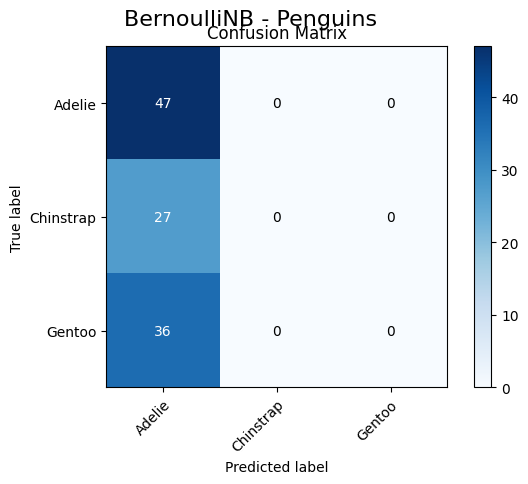

In [ ]:
print("\n" + "-"*70)
print("4. BERNOULLINB")
print("-"*70)

binarizer = Binarizer(threshold=Xtrain_peng.median().mean())
Xtrain_bin = binarizer.fit_transform(Xtrain_peng)
Xtest_bin = binarizer.transform(Xtest_peng)

modelo = BernoulliNB()
modelo.fit(Xtrain_bin, ytrain_peng)
y_pred = modelo.predict(Xtest_bin)
precision = accuracy_score(ytest_peng, y_pred)
precisiones_penguins['BernoulliNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_peng, y_pred, classes=clases_penguins,
                     normalize=False, title='Confusion Matrix',
                     titleSup='BernoulliNB - Penguins')
plt.show()

CategoricalNB


----------------------------------------------------------------------
5. CATEGORICALNB
----------------------------------------------------------------------
Precisión: 0.95
Confusion matrix, without normalization
[[41  6  0]
 [ 0 27  0]
 [ 0  0 36]]


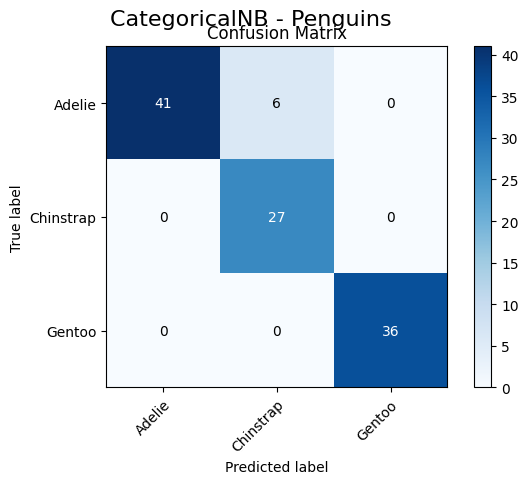

In [ ]:
print("\n" + "-"*70)
print("5. CATEGORICALNB")
print("-"*70)

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
Xtrain_cat = discretizer.fit_transform(Xtrain_peng)
Xtest_cat = discretizer.transform(Xtest_peng)

modelo = CategoricalNB()
modelo.fit(Xtrain_cat, ytrain_peng)
y_pred = modelo.predict(Xtest_cat)
precision = accuracy_score(ytest_peng, y_pred)
precisiones_penguins['CategoricalNB'] = precision
print(f"Precisión: {precision:.2f}")

plot_confusion_matrix(ytest_peng, y_pred, classes=clases_penguins,
                     normalize=False, title='Confusion Matrix',
                     titleSup='CategoricalNB - Penguins')
plt.show()

COMPARATIVO



RESUMEN DE RESULTADOS

--- DATASET IRIS ---
GaussianNB: 0.94
MultinomialNB: 0.62
ComplementNB: 0.62
BernoulliNB: 0.62
CategoricalNB: 0.96

--- DATASET PENGUINS ---
GaussianNB: 0.96
MultinomialNB: 0.75
ComplementNB: 0.76
BernoulliNB: 0.43
CategoricalNB: 0.95


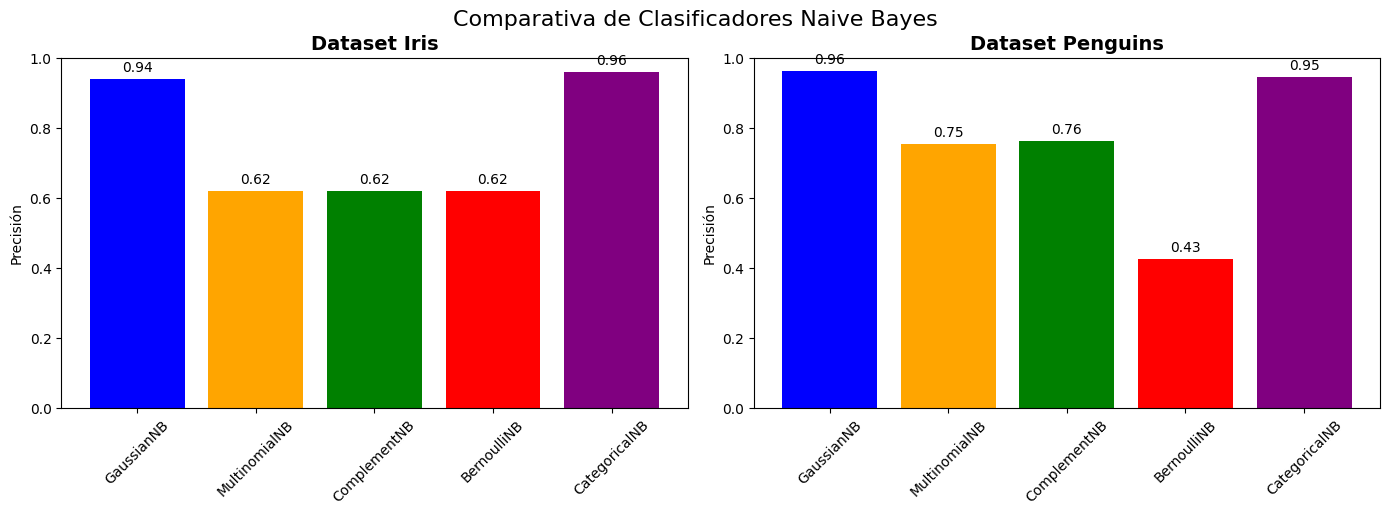


FIN DEL ANÁLISIS


In [ ]:
print("\n\n" + "="*70)
print("RESUMEN DE RESULTADOS")
print("="*70)

print("\n--- DATASET IRIS ---")
for clasificador, precision in precisiones_iris.items():
    print(f"{clasificador}: {precision:.2f}")

print("\n--- DATASET PENGUINS ---")
for clasificador, precision in precisiones_penguins.items():
    print(f"{clasificador}: {precision:.2f}")

# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico para Iris
nombres = list(precisiones_iris.keys())
valores = list(precisiones_iris.values())
ax1.bar(nombres, valores, color=['blue', 'orange', 'green', 'red', 'purple'])
ax1.set_title('Dataset Iris', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precisión')
ax1.set_ylim([0, 1])
ax1.tick_params(axis='x', rotation=45)
# Añadir valores encima de las barras
for i, v in enumerate(valores):
    ax1.text(i, v + 0.02, f'{v:.2f}', ha='center')

# Gráfico para Penguins
nombres = list(precisiones_penguins.keys())
valores = list(precisiones_penguins.values())
ax2.bar(nombres, valores, color=['blue', 'orange', 'green', 'red', 'purple'])
ax2.set_title('Dataset Penguins', fontsize=14, fontweight='bold')
ax2.set_ylabel('Precisión')
ax2.set_ylim([0, 1])
ax2.tick_params(axis='x', rotation=45)
# Añadir valores encima de las barras
for i, v in enumerate(valores):
    ax2.text(i, v + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.suptitle('Comparativa de Clasificadores Naive Bayes', fontsize=16, y=1.02)
plt.show()

print("\n" + "="*70)
print("FIN DEL ANÁLISIS")
print("="*70)